In [41]:
# setup libraries + read file

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pickle

# read file
df = pd.read_csv(r'C:\Users\danie\Documents\GitHub\LTC-Research-Challenge\data\2019 Line 280 AVL allscripts.csv')
# df = pd.read_csv('data/2019 Line 280 AVL allscripts.csv')

C:\Users\danie\AppData\Local\Temp/ipykernel_25156/2774562031.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
C:\Users\danie\AppData\Local\Temp/ipykernel_25156/2774562031.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df1.drop(['Actual Run Time'],1)) #using everything except class to train


<bound method NDFrame.head of         Scheduled Run Time  Actual Run Time  Enc_Hour__0  Enc_Hour__1  \
0                        0                0            0            0   
1                        8                6            0            0   
2                        6                6            0            0   
3                        9               10            0            0   
4                        0                6            0            0   
...                    ...              ...          ...          ...   
202608                   0                0            0            0   
202609                   9                9            0            0   
202610                   0               10            0            0   
202611                   0                3            0            0   
202612                   0                6            0            0   

        Enc_Hour__5  Enc_Hour__6  Enc_Hour__7  Enc_Hour__8  Enc_Hour__9  \
0                 

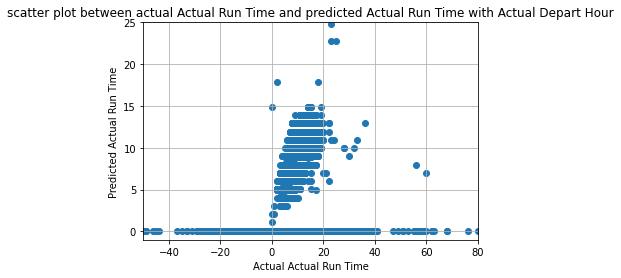

Mean Squared Error : 32.17648398466388
Mean Absolute Error : 2.7887828825553194
[0.96432314 0.93313305 0.9575106  0.97698036 0.9671427 ]
0.96 accuracy with a standard deviation of 0.01


In [52]:
# Actual Depart Hour only

df1 = df.copy()

df1 = pd.get_dummies(df1, columns=['Actual Depart Hour'],prefix=['Enc_Hour_'])


df1.fillna(value = -9999)
enc = OneHotEncoder(handle_unknown='ignore')

df1['Scheduled Run Time'] = df1['Scheduled Run Time'].astype(int)
df1['Actual Run Time'] = df1['Actual Run Time'].astype(int)

df1.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
    'Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart',\
   'Miles from Prior Time Point', 'Bus Stop ID',
        'Initial Performance Result','Reported Performance Results','Actual Arrival','Waivers',\
            'Dwell Time', 'Scheduled Operating Speed','Actual Operating Speed',\
                'Run Time Variance','Day Type','Time Period',\
                        'Scheduled Depart DateTime', 'Actual Depart DateTime', \
                            'Same Stop Prev Trip Departure Offset', \
                                'Difference (Minutes)', 'Prev Departure Offset','Day of Week','Transit Date Month'], 1, inplace=True)
print(df1.head)
X = np.array(df1.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df1['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

lr_sgd = SGDRegressor(loss='huber')
%time lr_sgd.fit(X_train, Y_train)


plt.scatter(Y_test, lr_sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Actual Run Time')
plt.ylabel('Predicted Actual Run Time')
plt.title('scatter plot between actual Actual Run Time and predicted Actual Run Time with Actual Depart Hour')
plt.ylim(-1,25)
plt.xlim(-50,80)
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lr_sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lr_sgd.predict(X_test)))

scores = cross_val_score(lr_sgd, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\danie\AppData\Local\Temp/ipykernel_25156/413912930.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
C:\Users\danie\AppData\Local\Temp/ipykernel_25156/413912930.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df2.drop(['Actual Run Time'],1)) #using everything except class to train


<bound method NDFrame.head of         Scheduled Run Time  Actual Run Time  Enc_Hour__0  Enc_Hour__1  \
0                        0                0            0            0   
1                        8                6            0            0   
2                        6                6            0            0   
3                        9               10            0            0   
4                        0                6            0            0   
...                    ...              ...          ...          ...   
202608                   0                0            0            0   
202609                   9                9            0            0   
202610                   0               10            0            0   
202611                   0                3            0            0   
202612                   0                6            0            0   

        Enc_Hour__5  Enc_Hour__6  Enc_Hour__7  Enc_Hour__8  Enc_Hour__9  \
0                 

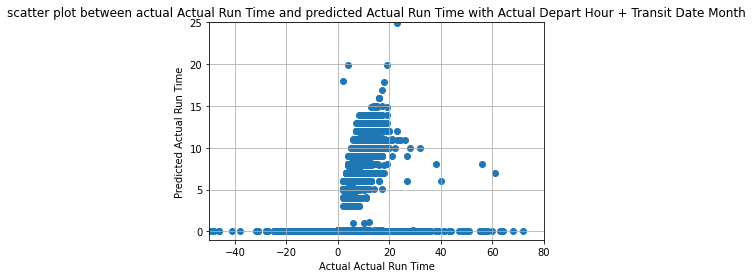

Mean Squared Error : 32.37627517269678
Mean Absolute Error : 2.8089735776891533
[0.88004654 0.9689134  0.97499546 0.96213751 0.96716638]
0.95 accuracy with a standard deviation of 0.04


In [53]:
# Actual Depart Hour + Transit Date Month

df2 = df.copy()

df2 = pd.get_dummies(df2, columns=['Actual Depart Hour', 'Transit Date Month'],prefix=['Enc_Hour_', 'Enc_Month_'])

df2.fillna(value = -9999)
enc = OneHotEncoder(handle_unknown='ignore')

df2['Scheduled Run Time'] = df2['Scheduled Run Time'].astype(int)
df2['Actual Run Time'] = df2['Actual Run Time'].astype(int)

df2.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
    'Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart',\
   'Miles from Prior Time Point', 'Bus Stop ID',
        'Initial Performance Result','Reported Performance Results','Actual Arrival','Waivers',\
            'Dwell Time', 'Scheduled Operating Speed','Actual Operating Speed',\
                'Run Time Variance','Day Type','Time Period',\
                        'Scheduled Depart DateTime', 'Actual Depart DateTime', \
                            'Same Stop Prev Trip Departure Offset', \
                                'Difference (Minutes)', 'Prev Departure Offset','Day of Week'], 1, inplace=True)
print(df2.head)
X = np.array(df2.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df2['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

lr_sgd = SGDRegressor(loss='huber')
%time lr_sgd.fit(X_train, Y_train)


plt.scatter(Y_test, lr_sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Actual Run Time')
plt.ylabel('Predicted Actual Run Time')
plt.title('scatter plot between actual Actual Run Time and predicted Actual Run Time with Actual Depart Hour + Transit Date Month')
plt.ylim(-1,25)
plt.xlim(-50,80)
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lr_sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lr_sgd.predict(X_test)))

scores = cross_val_score(lr_sgd, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

C:\Users\danie\AppData\Local\Temp/ipykernel_25156/239868483.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df3.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
C:\Users\danie\AppData\Local\Temp/ipykernel_25156/239868483.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df1.drop(['Actual Run Time'],1)) #using everything except class to train


<bound method NDFrame.head of         Scheduled Run Time  Actual Run Time  Enc_Hour__0  Enc_Hour__1  \
0                        0                0            0            0   
1                        8                6            0            0   
2                        6                6            0            0   
3                        9               10            0            0   
4                        0                6            0            0   
...                    ...              ...          ...          ...   
202608                   0                0            0            0   
202609                   9                9            0            0   
202610                   0               10            0            0   
202611                   0                3            0            0   
202612                   0                6            0            0   

        Enc_Hour__5  Enc_Hour__6  Enc_Hour__7  Enc_Hour__8  Enc_Hour__9  \
0                 

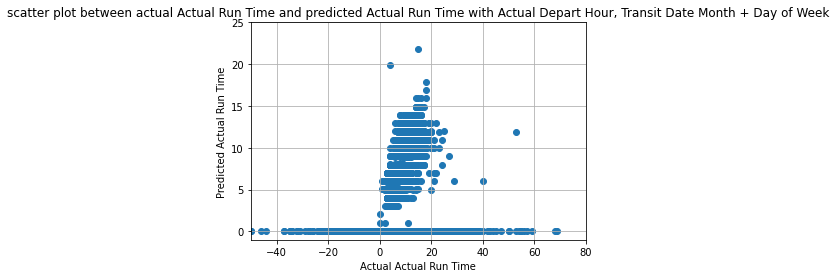

Mean Squared Error : 30.41316526812939
Mean Absolute Error : 2.776871817369323
[0.96824355 0.94018377 0.93855997 0.97010143 0.93957137]
0.95 accuracy with a standard deviation of 0.01


In [55]:
# Actual Depart Hour, Transit Date Month + Day of Week

df3 = df.copy()

df3 = pd.get_dummies(df3, columns=['Actual Depart Hour', 'Transit Date Month', 'Day of Week']\
    ,prefix=['Enc_Hour_', 'Enc_Month_', 'Enc_Day_'])

df3.fillna(value = -9999)
enc = OneHotEncoder(handle_unknown='ignore')

df3['Scheduled Run Time'] = df3['Scheduled Run Time'].astype(int)
df3['Actual Run Time'] = df3['Actual Run Time'].astype(int)

df3.drop(['Transit Date', 'Vehicle #', 'Block #', 'Route #', 'Trip #', 'Direction',\
    'Pattern','Bus Stop Name', 'Stop Sequence','Latitude','Longitude','Scheduled Depart','Actual Depart',\
   'Miles from Prior Time Point', 'Bus Stop ID',
        'Initial Performance Result','Reported Performance Results','Actual Arrival','Waivers',\
            'Dwell Time', 'Scheduled Operating Speed','Actual Operating Speed',\
                'Run Time Variance','Day Type','Time Period',\
                        'Scheduled Depart DateTime', 'Actual Depart DateTime', \
                            'Same Stop Prev Trip Departure Offset', \
                                'Difference (Minutes)', 'Prev Departure Offset'], 1, inplace=True)
print(df3.head)
X = np.array(df1.drop(['Actual Run Time'],1)) #using everything except class to train
Y = np.array(df1['Actual Run Time']) #class is the final result obviously
np.nan_to_num(X)
np.nan_to_num(Y)
pd.isnull(X)
np.nan_to_num(X)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

lr_sgd = SGDRegressor(loss='huber')
%time lr_sgd.fit(X_train, Y_train)



plt.scatter(Y_test, lr_sgd.predict(X_test))
plt.grid()
plt.xlabel('Actual Actual Run Time')
plt.ylabel('Predicted Actual Run Time')
plt.title('scatter plot between actual Actual Run Time and predicted Actual Run Time with Actual Depart Hour, Transit Date Month + Day of Week')
plt.ylim(-1,25)
plt.xlim(-50,80)
plt.show()
print('Mean Squared Error :',mean_squared_error(Y_test, lr_sgd.predict(X_test)))
print('Mean Absolute Error :',mean_absolute_error(Y_test, lr_sgd.predict(X_test)))

scores = cross_val_score(lr_sgd, X_test, Y_test, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))